In [40]:
import geopandas as gpd
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
from pathlib import Path
from cenpy import products

## Import Data

In [41]:
def geoify_df(station_df):
    #convert hr_df to geodataframe to plot the bike stations on map
    geometry = [Point(xy) for xy in zip(station_df.long, station_df.lat)]
    crs = 4326
    station_gdf = gpd.GeoDataFrame(station_df, crs=crs, geometry=geometry)
    return station_gdf

In [42]:
#get the 2010 census tracts in NYC
#https://s3.amazonaws.com/tripdata/index.html for the trip data
cenTract = gpd.read_file('../Data/NYC/CensusTracts/NYC_Census_Tracts_for_2010_US_Census/NYC_Census_Tracts_for_2010_US_Census.shp')

cur_nyc_df = geoify_df(pd.read_csv('../Data/NYC/stations/nyc_202101_stations.csv'))

In [43]:

#https://api.census.gov/data/2019/acs/acs5/variables.html variables for census
NYC = products.ACS(2019).from_place('New York City, NY', level='tract',
                                   variables = ['B08006_001E', 'B08006_002E', 'B08006_003E',
                                               'B08006_004E', 'B08006_005E', 'B08006_006E', 'B08006_007E',
                                                'B08006_008E', 'B08006_009E', 'B08006_0010E', 'B08006_0011E', 
                                                'B08006_0012E', 'B08006_0013E', 'B08006_0014E', 'B08006_0015E'])

/Users/katelyncmorrison/opt/anaconda3/envs/CURF/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



Matched: New York City, NY to New York city within layer Incorporated Places


In [44]:
NYC_demographics = products.ACS(2019).from_place('New York City, NY', level = 'tract',
                                                variables = ['B01003_001E', #total population
                                                            'B02001_002E', #white alone
                                                            'B02001_003E', #black or african american alone
                                                            'B02001_004E', #american indian / alaskan native
                                                            'B02001_005E' #asian alone
                                                            ])

/Users/katelyncmorrison/opt/anaconda3/envs/CURF/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



Matched: New York City, NY to New York city within layer Incorporated Places


In [45]:
NYC_vehicles = products.ACS(2019).from_place('New York City, NY', level = 'tract',
                                                variables = ['B08203_001E', #total
                                                            'B08203_002E', #no vehicle
                                                            'B08203_003E', #1 vehicle
                                                            'B08203_004E', #2 vehicles
                                                            'B08203_005E', #3 vehicles
                                                             'B08203_006E' #4+ vehicles
                                                            ])

/Users/katelyncmorrison/opt/anaconda3/envs/CURF/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



Matched: New York City, NY to New York city within layer Incorporated Places


In [46]:
NYC_income = products.ACS(2019).from_place('New York City, NY', level = 'tract',
                                          variables = ['B19013_001E'])

/Users/katelyncmorrison/opt/anaconda3/envs/CURF/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



Matched: New York City, NY to New York city within layer Incorporated Places


In [47]:
pgh_Test = products.ACS(2019).from_place('Pittsburgh, PA', 
                                         place_type='County Subdivision',
                                         level='tract', 
                                        variables = ['B01001A_001E'])

/Users/katelyncmorrison/opt/anaconda3/envs/CURF/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



Matched: Pittsburgh, PA to Pittsburgh city within layer County Subdivisions


## Visualize Data

In [48]:
NYC.head(1)

,GEOID,geometry,B08006_001E,B08006_002E,B08006_003E,B08006_004E,B08006_005E,B08006_006E,B08006_007E,B08006_008E,B08006_009E,state,county,tract
0,36085017009,"POLYGON ((-8259606.540 4945204.550, -8259551.5...",1915.0,1532.0,1373.0,159.0,124.0,24.0,11.0,233.0,138.0,36,085,017009


In [49]:
cenTract.head(1)

,OBJECTID,CTLabel,BoroCode,BoroName,CT2010,BoroCT2010,CDEligibil,NTACode,NTAName,PUMA,Shape__Are,Shape__Len,geometry
0,1,9,5,Staten Island,000900,5000900,E,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,"POLYGON ((-74.07921 40.64344, -74.07914 40.643..."


In [50]:
NYC_demographics.head(1)

,GEOID,geometry,B01003_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,state,county,tract
0,36085017009,"POLYGON ((-8259606.540 4945204.550, -8259551.5...",4485.0,4198.0,0.0,0.0,188.0,36,085,017009


## Transform Data

In [51]:
nyc_crs = NYC.to_crs("EPSG:4326")
nyc_crs.head(1)

,GEOID,geometry,B08006_001E,B08006_002E,B08006_003E,B08006_004E,B08006_005E,B08006_006E,B08006_007E,B08006_008E,B08006_009E,state,county,tract
0,36085017009,"POLYGON ((-74.19731 40.54326, -74.19681 40.543...",1915.0,1532.0,1373.0,159.0,124.0,24.0,11.0,233.0,138.0,36,085,017009


In [52]:
nyc_d_crs = NYC_demographics.to_crs("EPSG:4326")
nyc_d_crs.head(1)

,GEOID,geometry,B01003_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,state,county,tract
0,36085017009,"POLYGON ((-74.19731 40.54326, -74.19681 40.543...",4485.0,4198.0,0.0,0.0,188.0,36,085,017009


In [53]:
nyc_v_crs = NYC_vehicles.to_crs('EPSG:4326')
nyc_v_crs.head(1)

,GEOID,geometry,B08203_001E,B08203_002E,B08203_003E,B08203_004E,B08203_005E,B08203_006E,state,county,tract
0,36085017009,"POLYGON ((-74.19731 40.54326, -74.19681 40.543...",1558.0,54.0,522.0,718.0,151.0,113.0,36,085,017009


In [54]:
nyc_in_crs = NYC_income.to_crs('EPSG:4326')
nyc_in_crs.head(1)

,GEOID,geometry,B19013_001E,state,county,tract
0,36085017009,"POLYGON ((-74.19731 40.54326, -74.19681 40.543...",93125.0,36,085,017009


In [55]:
pgh_crs = pgh_Test.to_crs('EPSG:4326')
pgh_crs.head(1)

,GEOID,geometry,B01001A_001E,state,county,tract
0,42003270300,"POLYGON ((-80.04299 40.47900, -80.04296 40.479...",1154.0,42,003,270300


## Visualize Commuting Behaviors

Text(0.5, 1.0, 'Percent of people who drove alone to work by census tract')

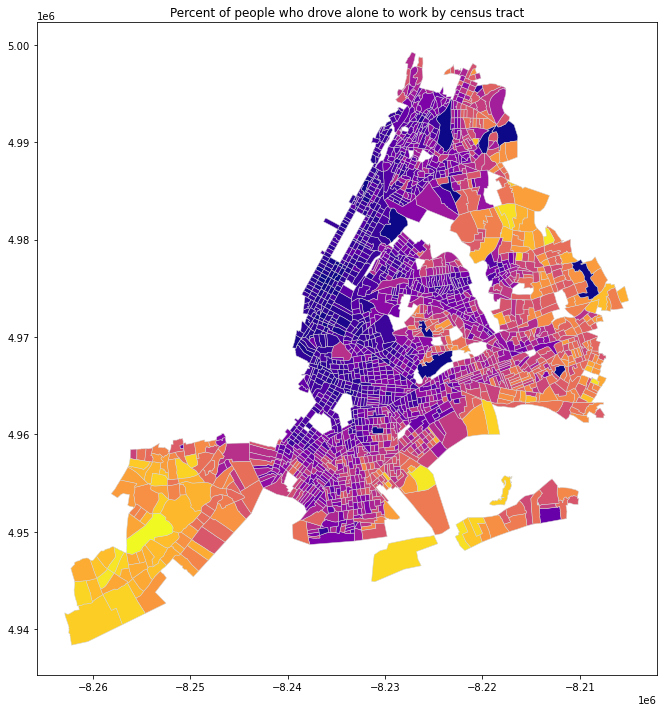

In [56]:
NYC['perc_alone'] = NYC['B08006_003E'] / NYC['B08006_001E']
ax = NYC.plot(column = "perc_alone", cmap="plasma",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5)
# cur_nyc_df.plot(ax=ax, color="Red", markersize=1)
plt.title("Percent of people who drove alone to work by census tract")

Text(0.5, 1.0, 'Percent of people who drove alone to work by census tract & Citi Bike Stations')

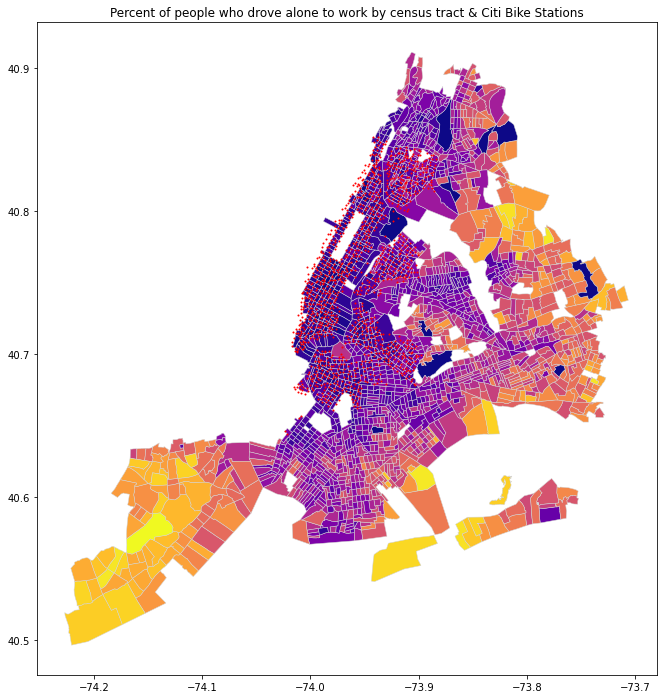

In [57]:
nyc_crs['perc_alone'] = nyc_crs['B08006_003E'] / nyc_crs['B08006_001E']
axcrs = nyc_crs.plot(column = "perc_alone", cmap="plasma",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5)
cur_nyc_df.plot(ax=axcrs, color="Red", markersize=1)
plt.title("Percent of people who drove alone to work by census tract & Citi Bike Stations")

Text(0.5, 1.0, 'Percent of people who take public transit (bus, subway, train) to work by census tract')

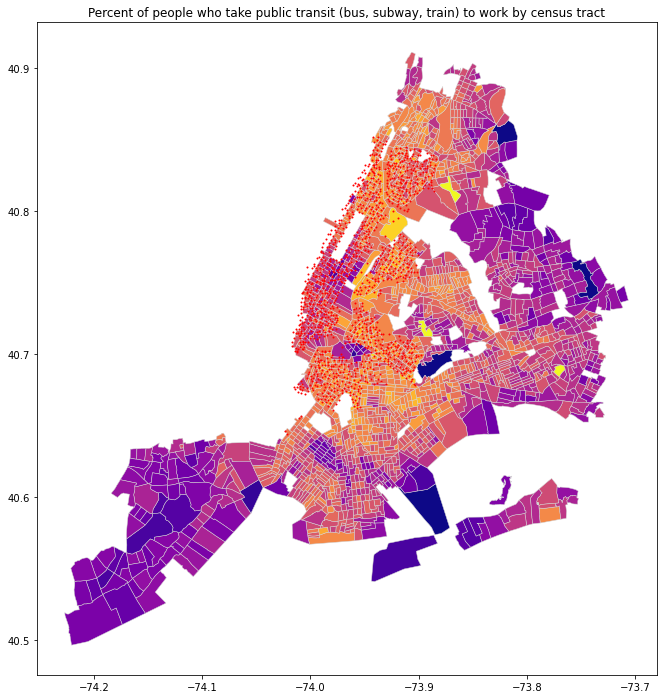

In [58]:
nyc_crs['perc_public'] = nyc_crs['B08006_008E'] / nyc_crs['B08006_001E']
ax = nyc_crs.plot(column = "perc_public", cmap="plasma",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5)
cur_nyc_df.plot(ax=ax, color="Red", markersize=1)
plt.title("Percent of people who take public transit (bus, subway, train) to work by census tract")

## Visualize Demographics

Text(0.5, 1.0, 'Percent of race (white) by census tract in relation to Citi Bike Stations')

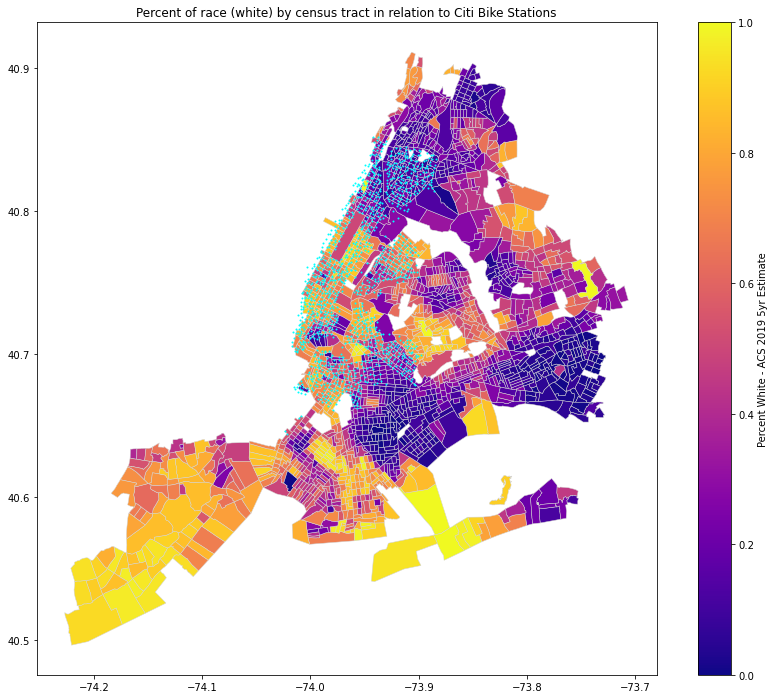

In [74]:
nyc_d_crs['perc_white'] = nyc_d_crs['B02001_002E'] / nyc_d_crs['B01003_001E']
ax = nyc_d_crs.plot(column = "perc_white", cmap="plasma",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5,
                   legend=True, legend_kwds={'label': "Percent White - ACS 2019 5yr Estimate",
                                                                     'orientation': "vertical"})
cur_nyc_df.plot(ax=ax, color="cyan", markersize=1)
plt.title("Percent of race (white) by census tract in relation to Citi Bike Stations")

Text(0.5, 1.0, 'Percent of race (african american or black) by census tract in relation to Citi Bike Stations')

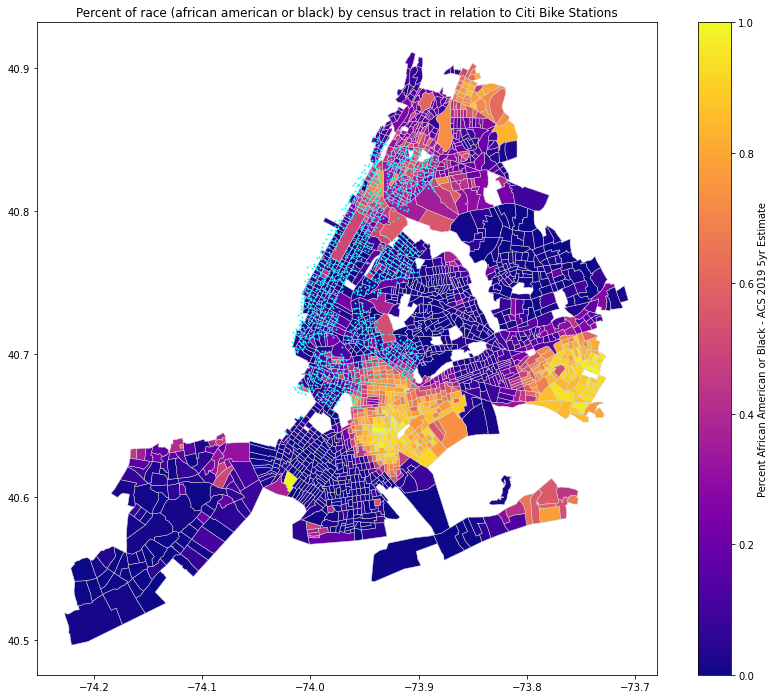

In [73]:
nyc_d_crs['perc_black'] = nyc_d_crs['B02001_003E'] / nyc_d_crs['B01003_001E']
ax = nyc_d_crs.plot(column = "perc_black", cmap="plasma",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5, legend=True, 
                    legend_kwds={'label': "Percent African American or Black - ACS 2019 5yr Estimate",
                                                                     'orientation': "vertical"})
cur_nyc_df.plot(ax=ax, color="cyan", markersize=1)
plt.title("Percent of race (african american or black) by census tract in relation to Citi Bike Stations")

Text(0.5, 1.0, 'Percent of race (native american) by census tract in relation to Citi Bike Stations')

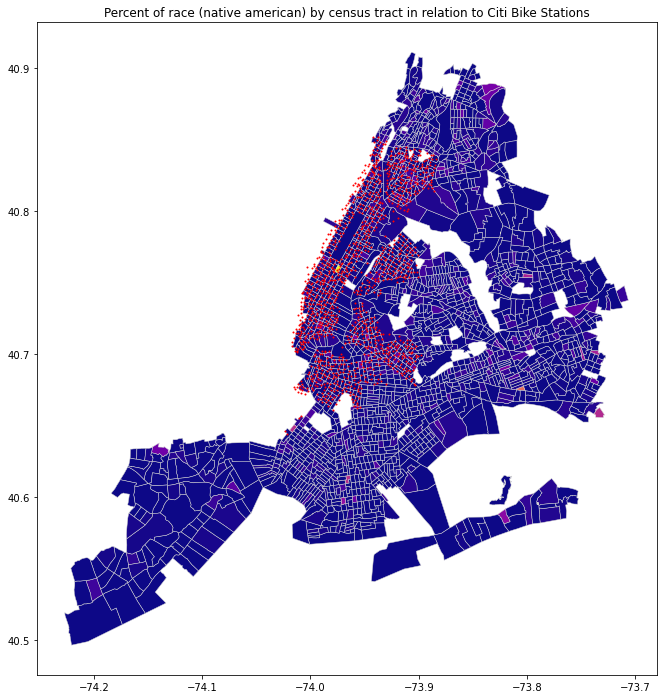

In [61]:
nyc_d_crs['perc_native'] = nyc_d_crs['B02001_004E'] / nyc_d_crs['B01003_001E']
ax = nyc_d_crs.plot(column = "perc_native", cmap="plasma",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5)
cur_nyc_df.plot(ax=ax, color="Red", markersize=1)
plt.title("Percent of race (native american) by census tract in relation to Citi Bike Stations")

Text(0.5, 1.0, 'Percent of race (asian) by census tract in relation to Citi Bike Stations')

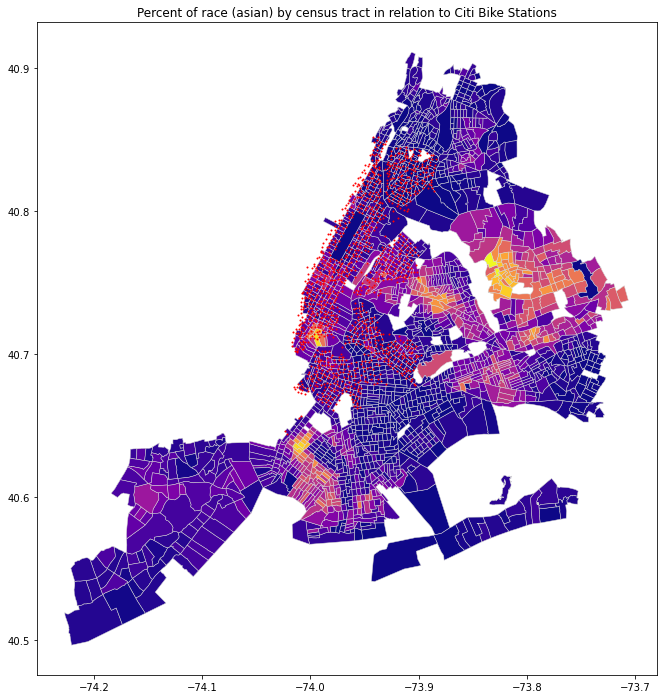

In [62]:
nyc_d_crs['perc_asian'] = nyc_d_crs['B02001_005E'] / nyc_d_crs['B01003_001E']
ax = nyc_d_crs.plot(column = "perc_asian", cmap="plasma",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5)
cur_nyc_df.plot(ax=ax, color="Red", markersize=1)
plt.title("Percent of race (asian) by census tract in relation to Citi Bike Stations")

Text(0.5, 1.0, 'Percent of race (asian, black, native american) by census tract in relation to Citi Bike Stations')

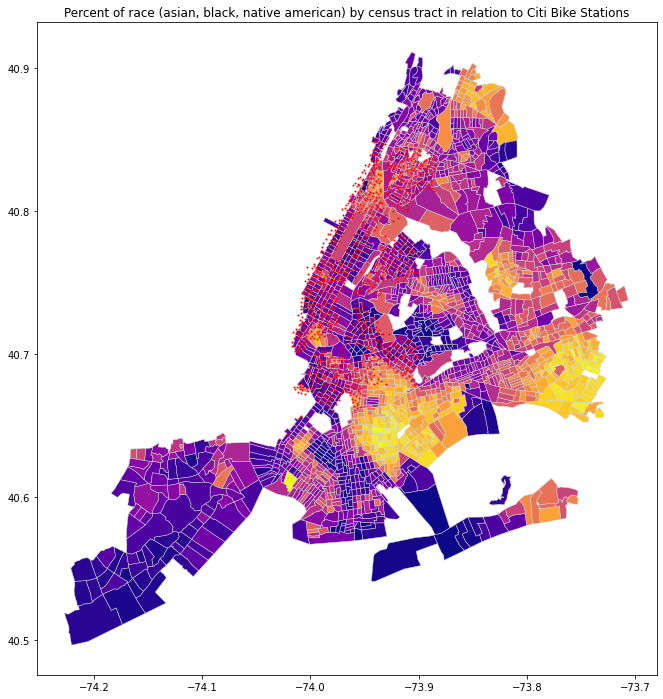

In [63]:
nyc_d_crs['perc_minority'] = (nyc_d_crs['B02001_003E'] + nyc_d_crs['B02001_004E'] + nyc_d_crs['B02001_005E'])/ nyc_d_crs['B01003_001E']
ax = nyc_d_crs.plot(column = "perc_minority", cmap="plasma",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5)
cur_nyc_df.plot(ax=ax, color="Red", markersize=1)
plt.title("Percent of race (asian, black, native american) by census tract in relation to Citi Bike Stations")

## Visualize Vehicle Ownership

Text(0.5, 1.0, "Percent of people who don't own at least one vehicle by census tract in relation to Citi Bike Stations")

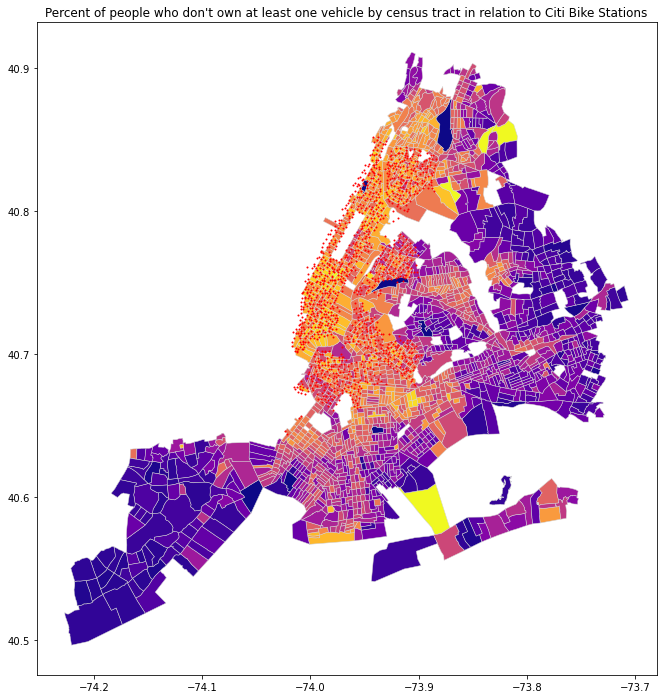

In [64]:
#B08203_001E
nyc_v_crs['nov'] = nyc_v_crs['B08203_002E']/ nyc_v_crs['B08203_001E']
ax = nyc_v_crs.plot(column = "nov", cmap="plasma",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5)
cur_nyc_df.plot(ax=ax, color="Red", markersize=1)
plt.title("Percent of people who don't own at least one vehicle by census tract in relation to Citi Bike Stations")

Text(0.5, 1.0, "Percent of people who don't own at least one vehicle by census tract in relation to Citi Bike Stations")

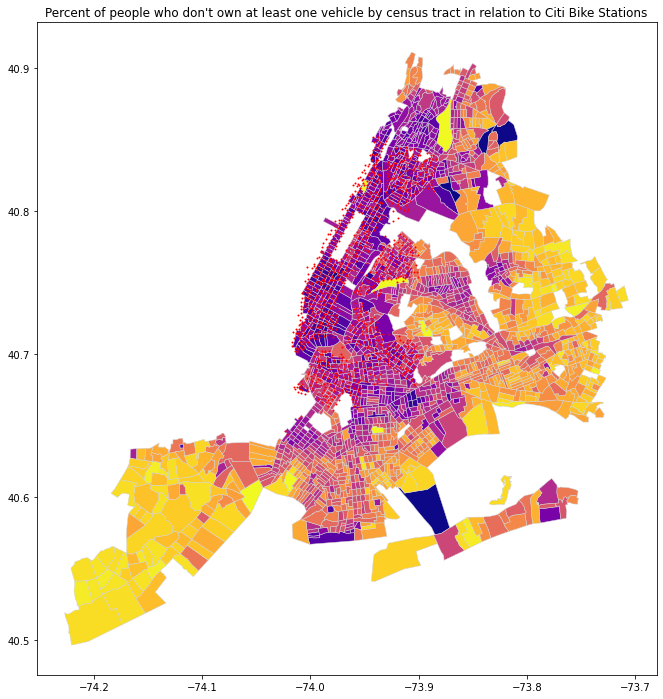

In [65]:
nyc_v_crs['vehicles'] = (nyc_v_crs['B08203_003E'] + nyc_v_crs['B08203_004E'] + nyc_v_crs['B08203_005E'] + nyc_v_crs['B08203_006E'])/ nyc_v_crs['B08203_001E']
ax = nyc_v_crs.plot(column = "vehicles", cmap="plasma",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5)
cur_nyc_df.plot(ax=ax, color="Red", markersize=1)
plt.title("Percent of people who don't own at least one vehicle by census tract in relation to Citi Bike Stations")

# Visualize Income - Median Household Income

Text(0.5, 1.0, 'Median Household Income')

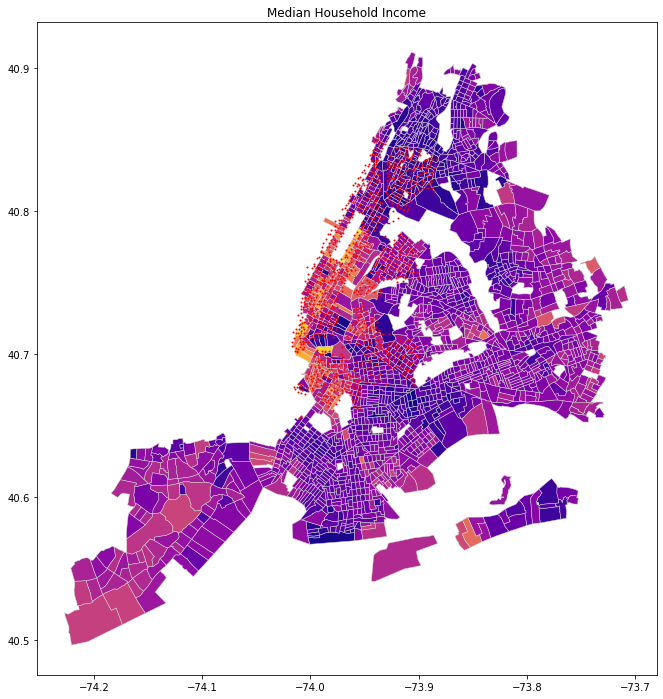

In [66]:
axcrs = nyc_in_crs.plot(column = "B19013_001E", cmap="plasma",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5)
cur_nyc_df.plot(ax=axcrs, color="Red", markersize=1)
plt.title("Median Household Income")